In [12]:
import numpy as np
import tensorflow as tf
import random
import pickle
import matplotlib.pyplot as plt
from d_u import load_CIFAR10
import structures
from amirata_functions import *
from pylab import rcParams
from tqdm import tqdm_notebook as tqdm
from CNN_class import CNN_SC
import scipy
import scipy.stats as stats
config_gpu = tf.ConfigProto()
config_gpu.gpu_options.allow_growth = True

In [15]:
data,aux_data = get_CIFAR10_data("../datasets/cifar-10-batches-py")
mean_image=data["mean_image"]
data,aux_data = get_CIFAR10_data("../datasets/cifar-10-batches-py")
mean_image=data["mean_image"]
X_val=data["X_val"][9000:]
y_val=data["y_val"][9000:]
dictionary=analyze_distance(X_val,data["X_train"])
dists=dictionary["dist"]
args=dictionary["args"]
tf.reset_default_graph()
training_data = (data["X_train"],data["y_train"])
validation_data1 = (aux_data["X_val1"][1:100],aux_data["y_val1"][1:100])
network3 = CNN_SC(network_name="network3", num_conv_layers=3,
                  num_forward_layers=1,input_shape=[32,32,3], 
                  reg = 1e-2,num_classes=10, kernel_sizes=[5,5,5],
                  hidden_sizes=[1024], pool_sizes=[2,2,2], 
                  padding = "same", path ="saved_networks/1C_3L_F",
                  dims=[64,128,256], learning_rate = 1e-3, 
                  batch_norm = True, dropout = 1)
network3.optimize(training_data, validation_data1, epochs=0,
                  load = True, save = True, verbose=True)

ResourceExhaustedError: OOM when allocating tensor of shape [1000,1000] and type double
	 [[Node: Sqrt_3/_0__cf__3 = Const[dtype=DT_DOUBLE, value=Tensor<type: double shape: [1000,1000] values: [4447.30828704285 3650.7322553153635 5797.0512331701866]...>, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

In [ ]:
epsilon=2
for i in range(1):
    print(i)
    output=network3.adversary(X_val[i],mean_image,epsilon,
                                         y_val[i],max_iter=30,
                                         sess=sess,verbose=False,alpha=1,
                                         mode="sign")
    if not output==None:
        

In [3]:
with open("dics/around_adversaries.pkl",'rb') as input:
    dic=pickle.load(input)
dic

{'f': array([ 223.,   75.,   26.,   20.,   14.,   10.,    7.,    9.,    5.,    5.]),
 'number_adversary_found': 430,
 'number_assumption_true': 394,
 'number_correct_predicted': 780}

In [11]:
with open("dics/synthetic_data_intertwindness_adversary",'rb') as input:
    dic=pickle.load(input)
dic.keys()

dict_keys(['90', '100', '120', '1layer', '80', '60', '110', '70', '2layer', '3layer'])

In [59]:
np.mean(dic["1layer"][0],1)

array([ 0.34358621,  0.31465149,  0.28603419,  0.26320106,  0.22975356,
        0.20611199,  0.20103743,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [53]:
number=np.zeros((3,7))
confidence=np.zeros((3,7))
for i,sigma in enumerate([60,70,80,90,100,110,120]):
    for j,layer in enumerate([1,2,3]):
        number[j,i]=len(dic["{}layer".format(layer)][1][i][1])*1./\
        dic["{}layer".format(layer)][1][i][0]
        confidence[j,i]=np.mean(dic["{}layer".format(layer)][1][i][1])

0 1
0 2
0 3
1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3
4 1
4 2
4 3
5 1
5 2
5 3
6 1
6 2
6 3


In [27]:
np.mean(dic["1layer"][0],1)

array([ 0.34358621,  0.31465149,  0.28603419,  0.26320106,  0.22975356,
        0.20611199,  0.20103743,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

([<matplotlib.axis.YTick at 0x7fb388bdf2e8>,
 <a list of 15 Text yticklabel objects>)

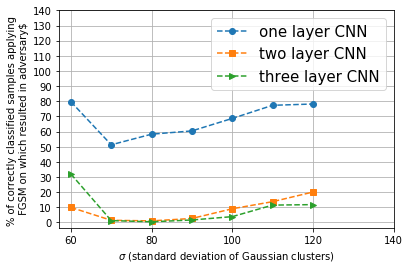

In [61]:
%matplotlib inline
plt.plot([60,70,80,90,100,110,120],100*(number[0]),"o--",
       [60,70,80,90,100,110,120],100*(number[1]),"s--",
        [60,70,80,90,100,110,120],100*(number[2]),">--")
rcParams.update({'font.size': 15})
rcParams['figure.figsize'] = 10, 10
plt.legend(["one layer CNN","two layer CNN","three layer CNN"])
plt.grid()

plt.xlabel("$\sigma$ (standard deviation of Gaussian clusters)")
plt.ylabel("% of correctly classified samples applying \n FGSM on which resulted in adversary$")
plt.xticks([60,80,100,120,140])
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140])

([<matplotlib.axis.YTick at 0x7fb3888576a0>,
 <a list of 15 Text yticklabel objects>)

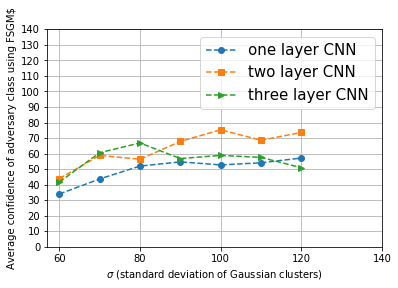

In [62]:
%matplotlib inline
plt.plot([60,70,80,90,100,110,120],100*(confidence[0]),"o--",
       [60,70,80,90,100,110,120],100*(confidence[1]),"s--",
        [60,70,80,90,100,110,120],100*(confidence[2]),">--")
rcParams.update({'font.size': 15})
rcParams['figure.figsize'] = 10, 10
plt.legend(["one layer CNN","two layer CNN","three layer CNN"])
plt.grid()

plt.xlabel("$\sigma$ (standard deviation of Gaussian clusters)")
plt.ylabel("Average confidence of adversary class using FSGM$")
plt.xticks([60,80,100,120,140])
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140])

In [72]:
np.mean(dic["3layer"][0][:7],1)

array([ 0.14941534,  0.21313941,  0.22573073,  0.20205687,  0.20317146,
        0.16905223,  0.16097482])

([<matplotlib.axis.XTick at 0x7fb3887d36d8>,
 <a list of 5 Text xticklabel objects>)

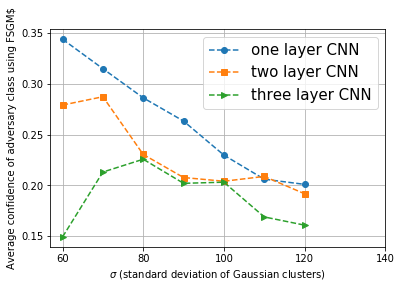

In [75]:
%matplotlib inline
plt.plot([60,70,80,90,100,110,120],np.mean(dic["1layer"][0][:7],1),"o--",
       [60,70,80,90,100,110,120],np.mean(dic["2layer"][0][:7],1),"s--",
        [60,70,80,90,100,110,120],np.mean(dic["3layer"][0][:7],1),">--")
rcParams.update({'font.size': 15})
rcParams['figure.figsize'] = 10, 10
plt.legend(["one layer CNN","two layer CNN","three layer CNN"])
plt.grid()

plt.xlabel("$\sigma$ (standard deviation of Gaussian clusters)")
plt.ylabel("Average confidence of adversary class using FSGM$")
plt.xticks([60,80,100,120,140])

In [6]:
training_data = (data["X_train"],data["y_train"])
validation_data1 = (aux_data["X_val1"],aux_data["y_val1"])
tf.reset_default_graph()
best_val=0
network1 = CNN_SC(network_name="network1", num_conv_layers=1, 
                   num_forward_layers=1,input_shape=[32,32,3], \
                  reg = 1e-6,num_classes=10, kernel_sizes=[5], \
                  hidden_sizes=[1024], pool_sizes=[8], padding = "same",\
                  path ='saved_networks/1C_1L_F', dims=[64], 
                  learning_rate = 5e-4, batch_norm = True, dropout = 1)
network1.optimize(training_data, validation_data1, epochs=0,
                  load = True, save = True, verbose=True)
sess0 = get_session()
saver=tf.train.Saver()
saver.restore(sess0,network1.path)
print((np.sum(np.argmax(network1.feedforward(aux_data["X_val2"],sess0),1)\
                ==aux_data["y_val2"]))*1./len(aux_data["y_val2"]))

KeyboardInterrupt: 

In [ ]:
tf.reset_default_graph()
training_data = (data["X_train"],data["y_train"])
validation_data1 = (aux_data["X_val1"],aux_data["y_val1"])
clustering = False
training_data = (data["X_train"],data["y_train"])
validation_data1 = (aux_data["X_val1"],aux_data["y_val1"])
best_val=0
network2 = CNN_SC(centers = np.random.random((10,1024)),\
                  new_loss=0, network_name="network2", num_conv_layers=2, 
                   num_forward_layers=1,input_shape=[32,32,3], \
                  reg = 1e-4,num_classes=10, kernel_sizes=[5,5], \
                  hidden_sizes=[1024], pool_sizes=[2,2], padding = "same",\
                  path ='saved_networks/1C_2L_F', dims=[64,18], 
                  learning_rate = 5e-4, batch_norm = True, dropout = 1)
network2.optimize(clustering, training_data, validation_data1, epochs=1,
                  load = True, save = True, verbose=True)
sess0 = get_session()
saver=tf.train.Saver()
saver.restore(sess0,network2.path)
print((np.sum(np.argmax(network2.feedforward(aux_data["X_val2"],sess0),1)\
                ==aux_data["y_val2"]))*1./len(aux_data["y_val2"]))
                

In [11]:
tf.reset_default_graph()
training_data = (data["X_train"],data["y_train"])
validation_data1 = (aux_data["X_val1"][1:100],aux_data["y_val1"][1:100])
network3 = CNN_SC(network_name="network3", num_conv_layers=3,
                  num_forward_layers=1,input_shape=[32,32,3], 
                  reg = 1e-2,num_classes=10, kernel_sizes=[5,5,5],
                  hidden_sizes=[1024], pool_sizes=[2,2,2], 
                  padding = "same", path ="saved_networks/1C_3L_F",
                  dims=[64,128,256], learning_rate = 1e-3, 
                  batch_norm = True, dropout = 1)
network3.optimize(training_data, validation_data1, epochs=0,
                  load = True, save = True, verbose=True)
sess0 = get_session()
saver=tf.train.Saver()
# saver.restore(sess0,network3.path)
# print((np.sum(np.argmax(network3.feedforward(aux_data["X_val2"],sess0),1)\
#                 ==aux_data["y_val2"]))*1./len(aux_data["y_val2"]))

Loading model from :saved_networks/1C_3L_F
INFO:tensorflow:Restoring parameters from saved_networks/1C_3L_F
validation accuracy before starting 0.79798
Best val accuracy: 0.79798
INFO:tensorflow:Restoring parameters from saved_networks/1C_3L_F


In [9]:
X_val=data["X_val"][9000:]
y_val=data["y_val"][9000:]
dictionary=analyze_distance(X_val,data["X_train"])
dists=dictionary["dist"]
args=dictionary["args"]

In [ ]:
number_correct_predicted=0
number_adversary_found=0
number_assumption_true=0
sess=get_session()
f=np.zeros(5)
tf.train.Saver().restore(sess,network3.path)
epsilon=2
for i in range(1000):
    print(i)
    output=network3.adversary(X_val[i],mean_image,epsilon,
                                     y_val[i],max_iter=30,
                                     sess=sess,verbose=False,alpha=1,
                                     mode="sign")
    if not output==None:
        adv,changed_label,confidence=output
        number_correct_predicted+=1
        if changed_label:
            number_adversary_found+=1
            true_label=y_val[i]
            new_label=np.argmax(network3.feedforward(adv,sess),1)
            places=np.where(data["y_train"][args[i]]==new_label)[0]
            for number,place_arg in enumerate(places[:5]):
                found=True
                for j in np.linspace(0,1,100):
                    point=(1-j)*adv+(j)*data["X_train"][args[i,place_arg]]
                    point_label=np.argmax(network3.feedforward(point,sess),1)
#                     print(i,place_arg,j,point_label)
                    if point_label!=new_label:
                        found=False
                        break
                if found:
                    number_assumption_true+=1
                    f[number]+=1
                    break

INFO:tensorflow:Restoring parameters from saved_networks/1C_3L_F
0
1
2
3
4
5
6
7
8
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54


In [139]:
number_adversary_found

5

In [124]:
data["y_train"][places[3]]

1

In [465]:
sess=get_session()
saver=tf.train.Saver()
saver.restore(sess,network3.path)
adv_neighb=np.zeros((100,10))
adv_image=np.zeros((100,10))
image_neighb=np.zeros((100,10))
for i in (range(100)):
    alpha=i*1./100
    adv_neighb[i]=network3.feedforward\
    ((1-alpha)*adv+(alpha)*neighb,sess)
    adv_image[i]=network3.feedforward\
    ((1-alpha)*adv+(alpha)*images,sess)
    image_neighb[i]=network3.feedforward\
    ((1-alpha)*images+(alpha)*neighb,sess)


INFO:tensorflow:Restoring parameters from saved_networks/1C_3L_F


In [472]:
dash=np.zeros((1000,10))
for i in range(1000):
    a1=np.random.uniform(1)
    a2=np.random.uniform(0,a1,1)
    point = a1*adv+a2*neighb1+(1-a1-a2)*neighb2
    dash[i]=network3.feedforward(point,sess)
    

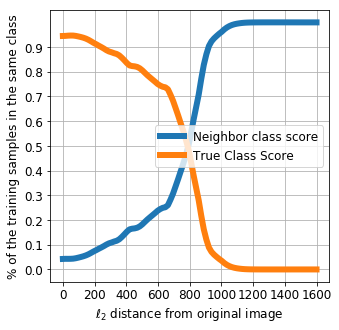

In [476]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5
rcParams.update({'font.size':12})
plt.plot(np.linspace(0,1600,100),image_neighb[:,4],
         np.linspace(0,1600,100),image_neighb[:,2],linewidth=6)
# plt.plot(kun,linewidth=6)
plt.legend(["Neighbor class score","True Class Score"])
plt.ylabel("Softmax Score")
plt.xlabel("$\ell_2$ distance from original image")
# plt.xlabel("r(fixed radius in original space)")
plt.ylabel("% of the training samples in the same class")
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.xticks(np.linspace(0,1600,9))
plt.grid()

In [435]:
gooz=[]
kun=[]
rs=[]
for i in range(20):
    r = (i+15)*100
    rs.append(r)
    gooz.append(np.sum(data["y_train"]\
                        [args_image[:(i+1)]]==2)*1./(i+1))
    kun.append(np.sum((data["y_train"][args_image]==2) *\
                       np.less(sorted_image,r))*\
                1./np.sum(np.less(sorted_image,r)))
    

In [386]:
np.sum(data["y_train"][args_image]==2 *\
                      np.less(sorted_image,r))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [475]:
np.sum(np.argmax(dash,1)==2)

412

In [405]:
(data["y_train"][args_image]==2) * np.less(sorted_image,r)

array([ True,  True, False, ..., False, False, False], dtype=bool)

In [444]:
data["y_train"][args_image[13]]

4

In [445]:
args_image[13]

19161

In [446]:
args_adv[13]

19161

In [455]:
np.linalg.norm(data["X_train"][19161]-data["X_train"][5633])

1539.4969957749188